# Statistics for Describing Data
It refers to the mathematics and techniques with which we understand data.

In [5]:
from collections import Counter
from linear_algebra import sum_of_squares, dot
import math
import numpy as np
import matplotlib.pyplot as plt # pyplot

In [36]:
num_friends = [100,49,41,40,25,21,21,19,19,18,
               18,16,15,15,15,15,14,14,13,13,
               13,13,12,12,11,10,10,10,10,10,
               10,10,10,10,10,10,10,10,10,10,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8
               ,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,
               6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,
               5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,
               3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
               1,1,1,1,1,1,1]

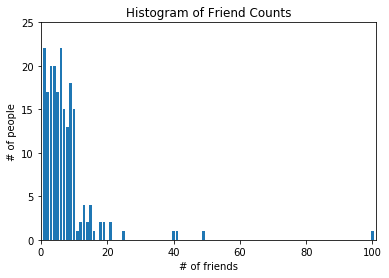

In [8]:
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

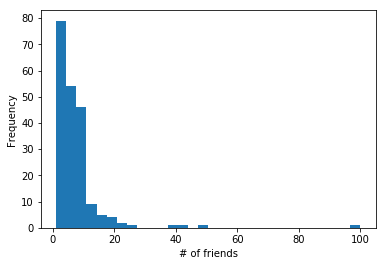

In [42]:
plt.hist(num_friends, bins= 30)
plt.xlabel("# of friends")
plt.ylabel('Frequency')
plt.show()

Unfortunately, this chart is still too difficult to interpret. 
- So you start generating some statistics. 

In [9]:
num_points = len(num_friends)               # 204

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

In [10]:
def mean(x):
    return sum(x) / len(x)

In [12]:
print("mean(num_friends)", mean(num_friends))

mean(num_friends) 7.333333333333333


In [44]:
np.mean(num_friends)

7.333333333333333

In [13]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

In [14]:
print("median(num_friends)", median(num_friends))

median(num_friends) 6.0


In [45]:
np.median(num_friends)

6.0

In [15]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [16]:
print("quantile(num_friends, 0.10)", quantile(num_friends, 0.10))
print("quantile(num_friends, 0.25)", quantile(num_friends, 0.25))
print("quantile(num_friends, 0.75)", quantile(num_friends, 0.75))
print("quantile(num_friends, 0.90)", quantile(num_friends, 0.90))

quantile(num_friends, 0.10) 1
quantile(num_friends, 0.25) 3
quantile(num_friends, 0.75) 9
quantile(num_friends, 0.90) 13


In [51]:
np.percentile(num_friends, 75)

9.0

In [17]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

In [18]:
print("mode(num_friends)", mode(num_friends))


mode(num_friends) [1, 6]


In [58]:
np.argmax(np.bincount(num_friends))
# Only the first occurrence is returned.

1

In [59]:
np.bincount(num_friends)

array([ 0, 22, 17, 20, 20, 17, 22, 15, 13, 18, 15,  1,  2,  4,  2,  4,  1,
        0,  2,  2,  0,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1])

In [56]:
from scipy import stats
stats.mode(num_friends, axis=None)

ModeResult(mode=array([1]), count=array([22]))

In [19]:
def data_range(x):
    return max(x) - min(x)

In [20]:
print("data_range(num_friends)", data_range(num_friends))


data_range(num_friends) 99


In [62]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

print("variance(num_friends)", variance(num_friends))


variance(num_friends) 81.54351395730716


In [63]:
print(np.var(num_friends))

81.1437908497


In [64]:
def standard_deviation(x):
    return math.sqrt(variance(x))

print("standard_deviation(num_friends)", standard_deviation(num_friends))


standard_deviation(num_friends) 9.03014473623248


In [65]:
np.std(num_friends)

9.0079848384460117

In [66]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)
print("interquartile_range(num_friends)", interquartile_range(num_friends))


interquartile_range(num_friends) 6


In [29]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,
                 51.4,41.42,31.22,34.76,54.01,38.79,
                 47.59,49.1,27.66,41.03,36.73,48.65,28.12,
                 46.62,35.57,32.98,35,26.07,23.77,39.73,
                 40.57,31.65,31.21,36.32,20.45,21.93,26.02,
                 27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,
                 32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,
                 26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,
                 38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,
                 19.85,35.37,44.6,17.23,13.47,26.33,35.02,
                 32.09,24.81,19.33,28.77,24.26,31.98,25.73,
                 24.86,16.28,34.51,15.23,39.72,40.8,26.06,
                 35.76,34.76,16.13,44.04,18.03,19.65,32.62,
                 35.59,39.43,14.18,35.24,40.13,41.82,35.45,
                 36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,
                 26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,
                 18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,
                 18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,
                 32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,
                 27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,
                 19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,
                 27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,
                 9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,
                 26.89,23.48,8.38,27.81,32.35,23.84]


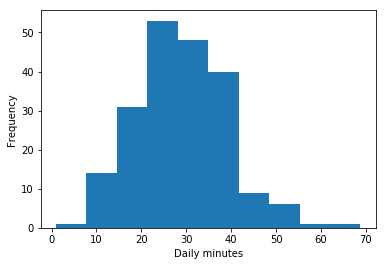

In [33]:
plt.hist(daily_minutes)
plt.xlabel('Daily minutes')
plt.ylabel('Frequency')
plt.show()

In [24]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

print("covariance(num_friends, daily_minutes)", covariance(num_friends, daily_minutes))


covariance(num_friends, daily_minutes) 22.425435139573064


In [67]:
np.cov(num_friends, daily_minutes)

array([[  81.54351396,   22.42543514],
       [  22.42543514,  100.78589895]])

In [25]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
print("correlation(num_friends, daily_minutes)", correlation(num_friends, daily_minutes))


correlation(num_friends, daily_minutes) 0.24736957366478218


In [71]:
np.corrcoef(num_friends, daily_minutes)

array([[ 1.        ,  0.24736957],
       [ 0.24736957,  1.        ]])

In [72]:
from scipy.stats.stats import pearsonr   
  
pearsonr(num_friends, daily_minutes)

(0.24736957366478224, 0.00036104739734502003)

In [26]:
outlier = num_friends.index(100) # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]


print("correlation(num_friends_good, daily_minutes_good)", correlation(num_friends_good, daily_minutes_good))


correlation(num_friends_good, daily_minutes_good) 0.5736792115665573
